In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [11]:
df=pd.read_csv(r'D:\Data Science\Assignments\Assignment #6 Logistic Regression\bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [15]:
df.shape

(45211, 17)

In [16]:
df=df.dropna()
df.shape

(45211, 17)

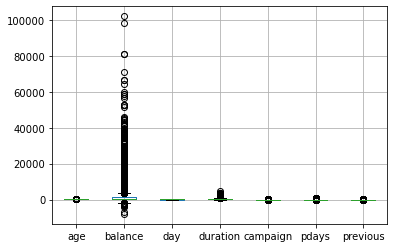

In [17]:
df.boxplot()

In [18]:
q3=df.quantile(0.75)
q1=df.quantile(0.25)
iqr=q3-q1
ub=q3+((1.5)*(iqr))
lb=q1-(1.5*(iqr))
print(ub,
     lb)

age           70.5
balance     3462.0
day           40.5
duration     643.0
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64 age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64


In [19]:
df.duplicated().sum()

0

In [20]:
index=df[(df.age>70.5)|(df.age<10.5)|(df.balance>3462)|(df.balance<-1962)|(df.day>40.5)|(df.day<-11.5)|(df.duration>643)|(df.duration<-221)|(df.campaign>6)|(df.campaign<-2)|(df.pdays>-1)|(df.pdays<-1)|(df.previous>0)|(df.previous<0)].index

In [21]:
len(index)

17018

In [22]:
df.shape

(45211, 17)

In [23]:
df1=df.drop(index)

In [24]:
df1.shape

(28193, 17)

In [25]:
y=df1['y']
y_=pd.DataFrame(y)
y_

,y
0,no
1,no
2,no
3,no
4,no
...,...
45198,no
45202,yes
45203,yes
45205,yes


In [26]:
dummies=pd.get_dummies(y_)
dummies1=dummies.drop('y_yes',axis=1)
dummies1

,y_no
0,1
1,1
2,1
3,1
4,1
...,...
45198,1
45202,0
45203,0
45205,0


In [28]:
df2=df1.drop('y',axis=1)
df3=pd.get_dummies(df2)

In [29]:
X=df3

In [31]:
Y=dummies1
model=LogisticRegression()
model.fit(X,Y)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predict=model.predict(X)
predict_=pd.DataFrame(predict)
predict_

,0
0,1
1,1
2,1
3,1
4,1
...,...
28188,1
28189,1
28190,1
28191,1


In [33]:
Y

,y_no
0,1
1,1
2,1
3,1
4,1
...,...
45198,1
45202,0
45203,0
45205,0


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,predict)
print (confusion_matrix)

[[  153  1446]
 [  162 26432]]


In [35]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,predict))

              precision    recall  f1-score   support

           0       0.49      0.10      0.16      1599
           1       0.95      0.99      0.97     26594

    accuracy                           0.94     28193
   macro avg       0.72      0.54      0.57     28193
weighted avg       0.92      0.94      0.92     28193

